### AUDIO PROCESSING FOR FINDING OUT MOTOR RPM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as sw

In [4]:
sam, d = sw.read("audio/fan.wav")
print(sam)
print(np.size(d))
print(d)

16000
322560
[    0     0     0 ... -6175 -6099 -6508]


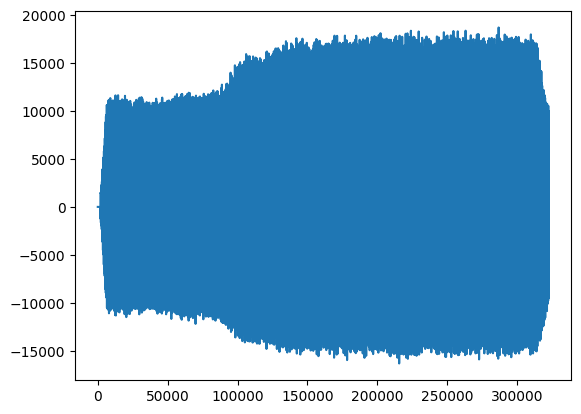

In [5]:
plt.plot(d)

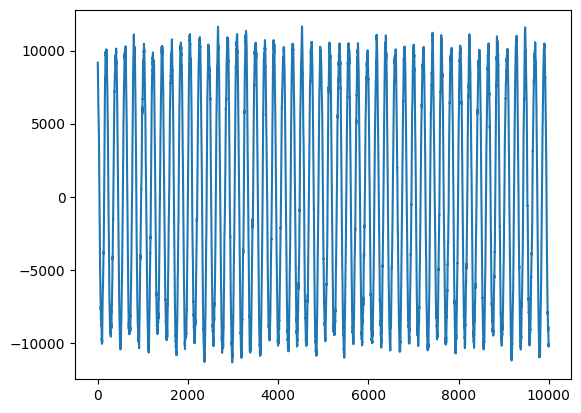

In [7]:
plt.plot(d[10000:20000])

Text(0, 0.5, 'Audio signal near a fan')

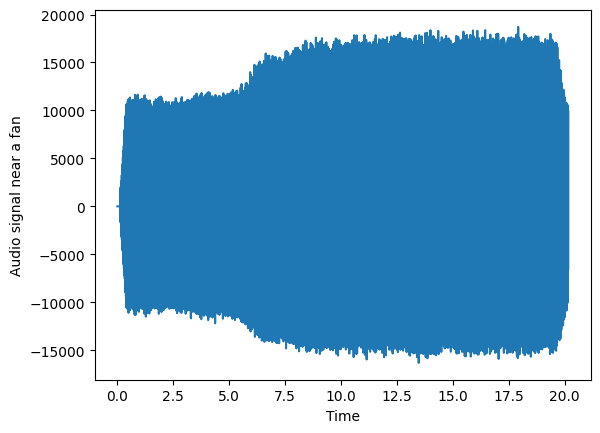

In [8]:
N = np.size(d)
t = np.arange(N)*1.0/sam
plt.plot(t,d)
plt.xlabel("Time")
plt.ylabel("Audio signal near a fan")

In [9]:
from scipy.fft import fft, fftfreq

In [10]:
dk = fft(d)
print(d)
print(dk)

[    0     0     0 ... -6175 -6099 -6508]
[-23744835.              -0.j           4953417.16636834-8072844.66193376j
   -205194.63706215-3595338.25700856j ...
    686807.29198154 +995134.5194678j    -205194.63706215+3595338.25700856j
   4953417.16636834+8072844.66193376j]


In [12]:
xk = fftfreq(N, 1.0/sam)
print(xk)

[ 0.          0.04960317  0.09920635 ... -0.14880952 -0.09920635
 -0.04960317]


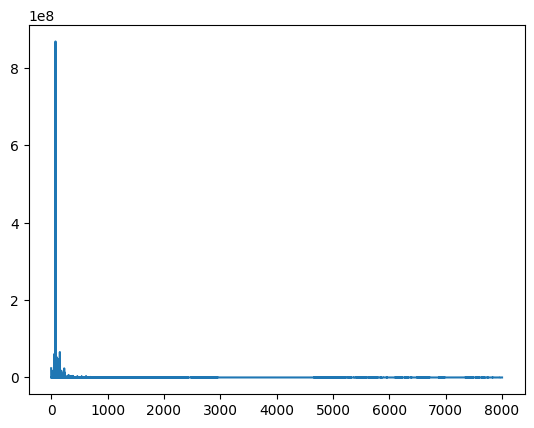

In [13]:
dk = fft(d)[:N//2] 
#it is symmetric so we take only half the data
xk = fftfreq(N, 1.0/sam)[:N//2]
plt.plot(xk, np.abs(dk))

In [22]:
max_freq = 0
j = 0;
for i in range(np.size(xk)):
    if(np.abs(dk[i])>max_freq):
        max_freq = np.abs(dk[i])
        j = i

In [23]:
max_freq

867725513.5305758

In [25]:
j

1563

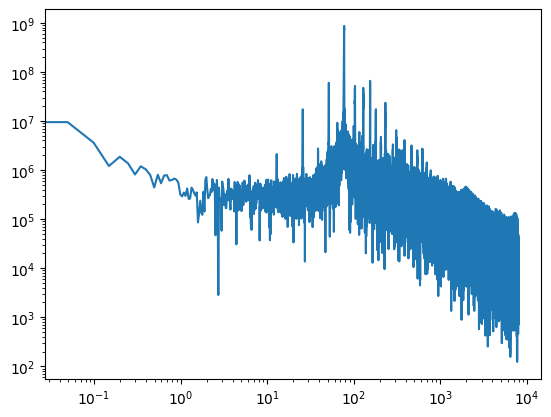

In [21]:
plt.loglog(xk, np.abs(dk))

In [26]:
from scipy.signal import find_peaks

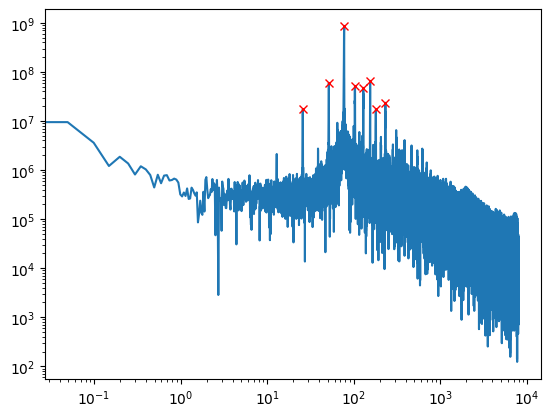

In [27]:
plt.plot(xk,np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height= 1e7 , distance=200)
# peaks is the indices..
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [29]:
print(xk[peaks])

[ 25.79365079  51.53769841  77.5297619  103.37301587 128.86904762
 154.61309524 180.35714286 231.89484127]
